In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import os
print(os.listdir('C:/Users/gts/handwritten project/M2/'))

['.ipynb_checkpoints', 'hand written.ipynb', 'train.csv']


In [3]:
data = pd.read_csv("C:/Users/gts/handwritten project/M2/train.csv")

In [4]:
data.shape

(42000, 785)

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
X = data.drop("label",axis=1)

In [9]:
Y = data["label"]

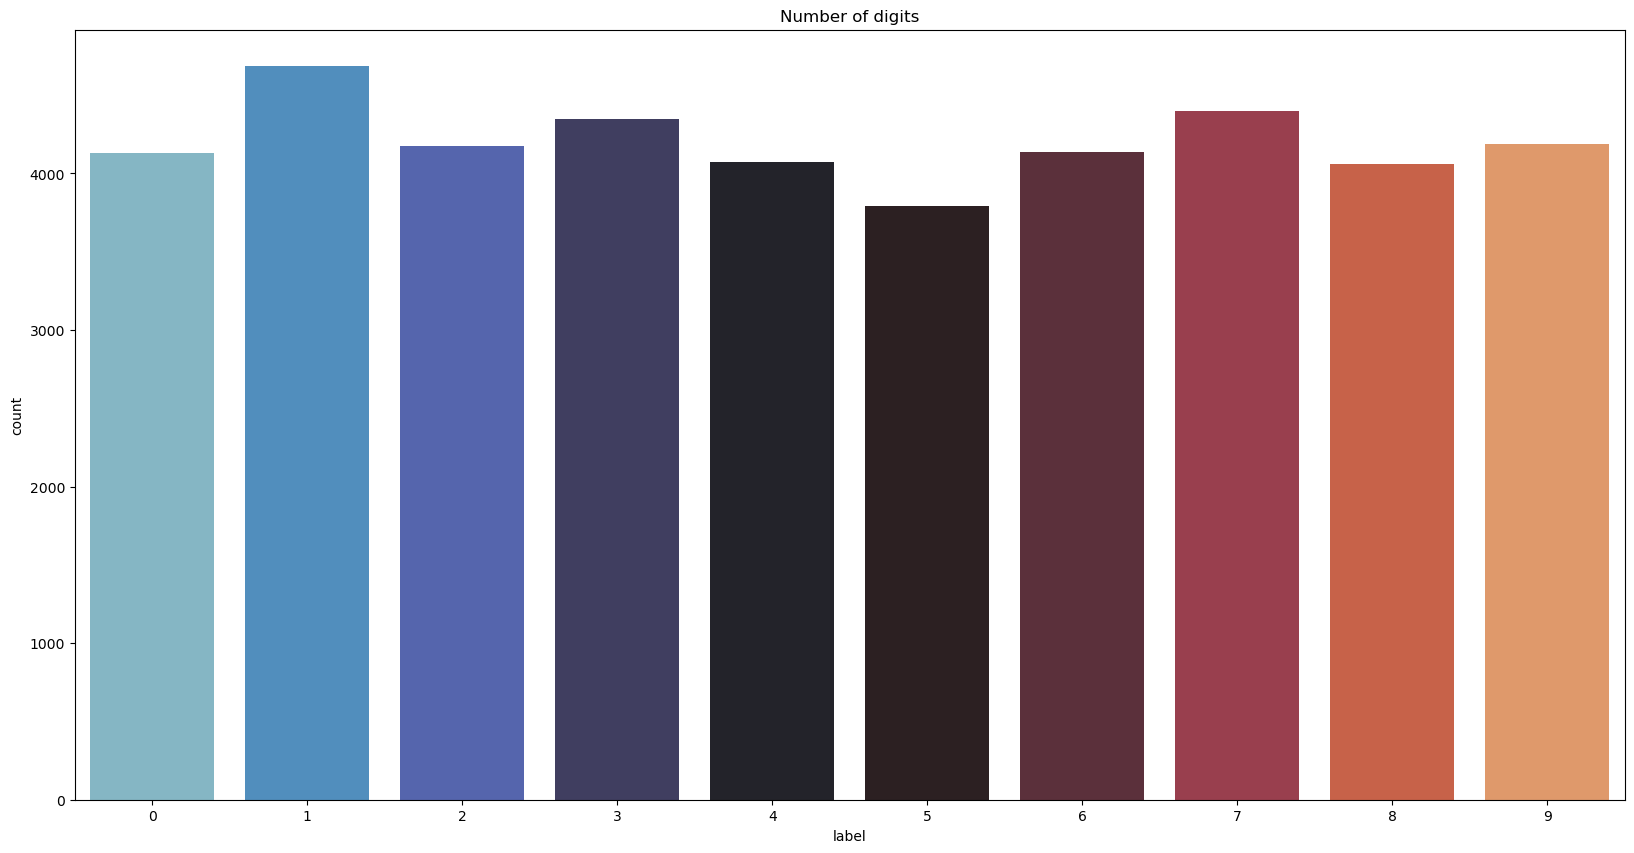

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(Y,palette="icefire")
plt.title("Number of digits")
plt.show()

In [11]:
Y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

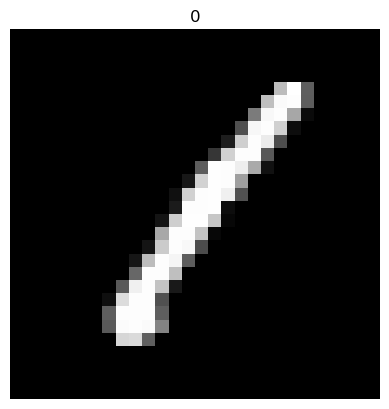

In [16]:
img = X.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(X.iloc[0,0])
plt.axis("off")
plt.show()

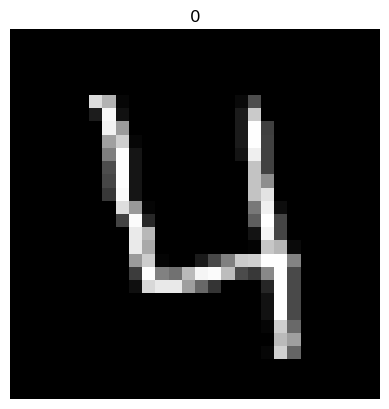

In [18]:
img = X.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(X.iloc[3,0])
plt.axis("off")
plt.show()

In [21]:
# Normalize the data
X = X / 255.0
print("x shape: ",X.shape)


x shape:  (42000, 28, 28, 1)


In [23]:
# Reshape
X = X.reshape(-1,28,28,1)

In [24]:
print("x shape: ",X.shape)

x shape:  (42000, 28, 28, 1)


In [26]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y, num_classes = 10)

In [28]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800,)
y_test shape (4200,)


In [33]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [34]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [39]:
# Compile the model
model.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

In [40]:
epochs = 10  
batch_size = 250

In [41]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [44]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 33s 217ms/step - loss: 0.6741 - accuracy: 0.7823 - val_loss: 0.3488 - val_accuracy: 0.9048
Epoch 2/10
151/151 [==============================] - 33s 219ms/step - loss: 0.6604 - accuracy: 0.7847 - val_loss: 0.3426 - val_accuracy: 0.9150
Epoch 3/10
151/151 [==============================] - 34s 225ms/step - loss: 0.6359 - accuracy: 0.7946 - val_loss: 0.3066 - val_accuracy: 0.9140
Epoch 4/10
151/151 [==============================] - 33s 217ms/step - loss: 0.6260 - accuracy: 0.7978 - val_loss: 0.3034 - val_accuracy: 0.9190
Epoch 5/10
151/151 [==============================] - 33s 218ms/step - loss: 0.6067 - accuracy: 0.8028 - val_loss: 0.2940 - val_accuracy: 0.9176
Epoch 6/10
151/151 [==============================] - 33s 221ms/step - loss: 0.5989 - accuracy: 0.8060 - val_loss: 0.2824 - val_accuracy: 0.9198
Epoch 7/10
151/151 [==============================] - 33s 216ms/step - loss: 0.5884 - accuracy: 0.8097 - val_loss: 0.2647 - val_ac

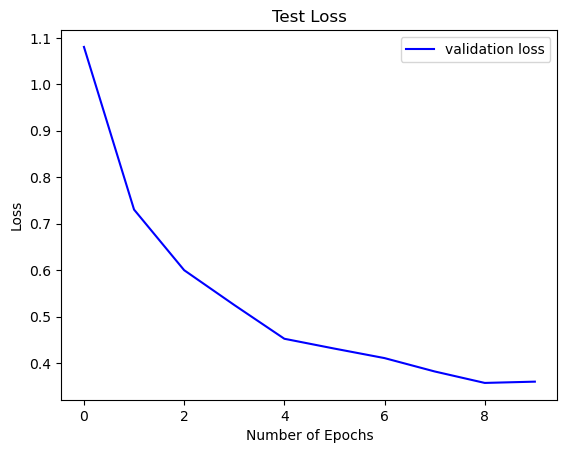

In [43]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['loss','val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model_json = model.to_json()
with open(r"./Model/lung_model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("lung_weights.h5")
